# This notebook check how much consistency can we see between squire and telescope results
- top dTEs shows good overlap at subFam level

In [1]:
# import packages
import pandas as pd
import numpy as np
import scanpy as sc
import sys
import os
import seaborn as sn

from matplotlib import pyplot as plt
from matplotlib_venn import venn2

In [2]:
sys.path.append("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/")
import zc_volcano

In [3]:
import warnings
warnings.filterwarnings( 'ignore' )

In [4]:
from tqdm import tqdm_notebook as tqnb
from tqdm import tqdm

## functions

In [25]:
#getting venn diagram
def zc_venn_diagram( list1, list2, name1, name2, 
                    title = None, ax = None,
                    print_elements = False, 
                    show_fig = True, save_fig = False, save_file_name = 'curr_venn.png'):
    """This function makes a venn diagram with some basic customized properties
    @param list1, list2: the two lists of elements to make venn diagram from. Can be in python list, or pd.Series or np array etc list-like objects
    @param name1, name2: the names for each list of elements that will be plotted on the diagram circle
    @param title: title of the plot
    @param ax: can pass-in an matplotlib Axes object, if not, will create one here
    @param show_fig, save_fig: boolean flags to set
    @param save_file_name: if save_fig is set True, need to pass-in a FULL file name to save (eg. venn1.png). If not, will use the defaul curr_venn.png in the current dir
    @return the ax for this plot"""

    # create ax 
    if( not ax):
        f, a = plt.subplots()
    else:
        a = ax

    # plot the venn diagram
    s1 = set(list1)
    s2 = set( list2)
    venn2( [ s1, s2 ], (name1, name2), ax= a)

    if( print_elements):
        intersection_ls = s1.intersection( s2)
        
        s1_only = s1- intersection_ls
        s2_only = s2 - intersection_ls

        print( f"intersection: {intersection_ls}")
        
        print( f"{name1} has: ")
        print( f"{s1_only }" )
        
        print( f"{name2} has: ")
        print( f"{s2_only}" )        
        

    # customize plotting 
    if( title ):
        t = a.set_title(title )

    if( save_fig):
        plt.savefig( save_file_name, bbox_inches='tight' )
        
    if( show_fig):
        plt.show()

    return a

In [27]:
def get_overlap( pd_col1 , pd_col2, col1_name = 'list 1', col2_name = 'list 2',  verbo = True ):
    s1 = set( pd_col1)
    s2 = set( pd_col2 )
    intersection_ls = s1.intersection( s2)

    if( verbo):
        print( f'{col1_name} has {len(s1)} unique elements')
        print( f'{col2_name} has {len(s2)} unique elements')
        print( f'Intersection has {len( intersection_ls)} elements')

    return intersection_ls
    

## load data

In [34]:
tele_indiv = pd.read_csv("./Deseq_indiv_locus_results.csv", header = 0 , index_col = None)
tele_indiv.head()

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
0,(A)n_15,24.106309,-0.599525,0.288728,-2.076435,0.037854,0.279189,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
1,(A)n_16,51.369320,-0.115342,0.200885,-0.574169,0.565853,0.863508,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
2,(A)n_17,72.183100,-0.273901,0.190399,-1.438564,0.150274,0.540315,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
3,(A)n_18,113.898323,-0.033522,0.146842,-0.228286,0.819424,0.954895,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
4,(A)n_19,184.535379,0.079692,0.117803,0.676481,0.498735,0.831150,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat


In [35]:
tele_subf = pd.read_csv("./Deseq_subF_results.csv", header = 0, index_col = None)
tele_subf.head()

,repName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
0,(A)n,4362.645444,0.030317,0.036694,0.826220,0.408680,0.701451,Simple_repeat,Simple_repeat,(A)n|Simple_repeat
1,(AAAAAAC)n,9.968577,-0.454688,0.514517,-0.883718,0.376848,0.681218,Simple_repeat,Simple_repeat,(AAAAAAC)n|Simple_repeat
2,(AAAAAAG)n,4.921180,0.401779,0.727247,0.552465,0.580630,NaN,Simple_repeat,Simple_repeat,(AAAAAAG)n|Simple_repeat
3,(AAAAAC)n,181.129230,-0.116781,0.124346,-0.939161,0.347648,0.656107,Simple_repeat,Simple_repeat,(AAAAAC)n|Simple_repeat
4,(AAAAACA)n,0.469283,-1.177608,2.426971,-0.485217,0.627522,NaN,Simple_repeat,Simple_repeat,(AAAAACA)n|Simple_repeat


In [36]:
squire_indiv = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = 0, index_col = 0 )
squire_indiv.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183
2,"chr3|96619212|96619284|ID4:ID:SINE|194|+,.",5.772588,0.121464,0.852163,0.142536,0.942801,1.0,TE,ID4:ID:SINE,ID4:ID:SINE_194
3,"chr15|93388865|93388965|PB1:Alu:SINE|227|-,.",32.028966,-0.216654,0.390147,-0.555314,0.978578,1.0,TE,PB1:Alu:SINE,PB1:Alu:SINE_227
4,"chr11|94175967|94176153|B2_Mm2:B2:SINE|98|-,.",7.127690,0.305487,0.591882,0.516129,0.893386,1.0,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_98


In [37]:
squire_subf = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_subF_dTE_results.csv", header= 0, index_col = 0 )

In [38]:
squire_subf.shape

(1186, 11)

## unify names
- all level of names are compatible, no need to make adjustment 

### get family and class name for squire data

In [39]:
squire_indiv.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183
2,"chr3|96619212|96619284|ID4:ID:SINE|194|+,.",5.772588,0.121464,0.852163,0.142536,0.942801,1.0,TE,ID4:ID:SINE,ID4:ID:SINE_194
3,"chr15|93388865|93388965|PB1:Alu:SINE|227|-,.",32.028966,-0.216654,0.390147,-0.555314,0.978578,1.0,TE,PB1:Alu:SINE,PB1:Alu:SINE_227
4,"chr11|94175967|94176153|B2_Mm2:B2:SINE|98|-,.",7.127690,0.305487,0.591882,0.516129,0.893386,1.0,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_98


In [40]:
squire_indiv['repName'] = [ s.split(":")[0] for s in squire_indiv['TE_name'] ]

In [41]:
squire_indiv['repFamily'] = [ s.split(":")[1] for s in squire_indiv['TE_name'] ]
squire_indiv['repClass'] = [ s.split(":")[2] for s in squire_indiv['TE_name'] ]

### check class and family level naming consistency

In [14]:
tele_indiv.columns

Index(['transcript_id', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat',
       'pvalue', 'padj', 'repClass', 'repFamily', 'repName', 'name_fam',
       'name_fam_class'],
      dtype='object')

In [15]:
tele_indiv['repClass'].unique()

array(['Simple_repeat', 'scRNA', 'rRNA', 'snRNA', 'srpRNA',
       'Low_complexity', 'DNA', 'LINE', 'SINE', 'LTR', 'Satellite', 'RC',
       'Unknown', 'Retroposon', 'Unspecified', 'tRNA'], dtype=object)

In [16]:
tele_indiv['repFamily'].unique()

array(['Simple_repeat', 'scRNA', 'rRNA', 'snRNA', 'srpRNA',
       'Low_complexity', 'PIF-Harbinger', 'L2', '5S-Deu-L2', 'tRNA-Deu',
       'hAT-Tip100', 'Alu', 'B2', 'B4', 'ERVK', 'hAT-Blackjack', 'CR1',
       'Y-chromosome', 'hAT-Charlie', 'TcMar-Tc1', 'ERVL', 'ERV1', 'LTR',
       'hAT', 'PiggyBac', 'DNA', 'Crypton-A', 'Crypton', 'TcMar',
       'hAT-Ac', 'MULE-MuDR', 'Satellite', 'L1', 'Helitron', 'ID',
       'TcMar-Tc2', 'RTE-X', 'tRNA', 'Gypsy', 'TcMar-Mariner',
       'TcMar-Tigger', 'L1-Tx1', 'Merlin', 'hAT?', 'MIR', 'ERVL-MaLR',
       'RTE-BovB', 'Unknown', 'tRNA-RTE', 'Dong-R4', 'Penelope', 'L1-dep',
       'Kolobok', 'Unspecified', 'I-Jockey', 'hAT-Tag1'], dtype=object)

In [19]:
len( tele_indiv['repName'].unique() )

5936

In [23]:
squire_indiv['repClass'].unique()
# tele_indiv has more repClass that 

array(['SINE', 'LINE', 'LTR', 'DNA', 'Retroposon', 'rRNA', 'scRNA',
       'Unspecified', 'snRNA', 'srpRNA', 'tRNA'], dtype=object)

In [25]:
#squire_indiv[ squire_indiv['repClass'] == 'Unspecified' ]

In [26]:
squire_indiv['repFamily'].unique()

array(['Alu', 'B4', 'ID', 'B2', 'L1', 'ERVL-MaLR', 'hAT-Charlie', 'MIR',
       'TcMar-Tigger', 'ERVK', 'ERVL', 'DNA', 'ERV1', 'LTR', 'hAT-Ac',
       'hAT-Tip100', 'L1-dep', 'CR1', 'rRNA', 'TcMar-Mariner', 'L2',
       'TcMar-Tc2', 'scRNA', 'Unspecified', 'hAT-Tag1', 'RTE-BovB',
       'snRNA', 'hAT', 'tRNA-RTE', '5S-Deu-L2', 'srpRNA', 'tRNA', 'Gypsy',
       'Dong-R4', 'hAT-Blackjack', 'RTE-X', 'Penelope', 'TcMar-Tc1',
       'L1-Tx1', 'I-Jockey', 'PiggyBac', 'Merlin', 'Kolobok'],
      dtype=object)

### check repName overlap
- all repName in squire indiv dTE can be found in telescope 

In [28]:
def get_overlap( pd_col1 , pd_col2, col1_name = 'list 1', col2_name = 'list 2',  verbo = True ):
    s1 = set( pd_col1)
    s2 = set( pd_col2 )
    intersection_ls = s1.intersection( s2)

    if( verbo):
        print( f'{col1_name} has {len(s1)} unique elements')
        print( f'{col2_name} has {len(s2)} unique elements')
        print( f'Intersection has {len( intersection_ls)} elements')

    return intersection_ls
    

In [43]:
repname_inter = get_overlap( tele_indiv['repName'] , squire_indiv['repName'], col1_name = 'telescope_indiv', col2_name = 'squire_indiv',  verbo = True )

telescope_indiv has 5936 unique elements
squire_indiv has 756 unique elements
Intersection has 756 elements


In [35]:
# because squire has way less unique elements, check the original number of squire dTE
squire_indiv.shape

(15235, 13)

### Check repFamily and repClass overlap
- all squire elements can be found in telescope

In [38]:
print( 'repFamily level:' )
repfam_inter = get_overlap( tele_indiv['repFamily'] , squire_indiv['repFamily'], col1_name = 'telescope_indiv', col2_name = 'squire_indiv',  verbo = True )

repFamily level:
telescope_indiv has 56 unique elements
squire_indiv has 43 unique elements
Intersection has 43 elements


In [39]:
print( 'repClass level:' )
repclass_inter = get_overlap( tele_indiv['repClass'] , squire_indiv['repClass'], col1_name = 'telescope_indiv', col2_name = 'squire_indiv',  verbo = True )

repClass level:
telescope_indiv has 16 unique elements
squire_indiv has 11 unique elements
Intersection has 11 elements


## Check overlap in top differential TEs
- based on the volcano plots ( see [report slides](https://docs.google.com/presentation/d/1qmWWbZeGRl46QceqScw7Uim1745PIsnf8r6yNJL3XdI/edit?usp=sharing) ), use abs( log2 FC) = 2 and p-adj 1e-5 as threshold 

### get top dTE in squire

In [45]:
squire_sig_up = squire_indiv[ (squire_indiv['padj'] < 1e-5) & (squire_indiv['log2FoldChange'] > 2) ]
squire_sig_down = squire_indiv[ (squire_indiv['padj'] < 1e-5) & (squire_indiv['log2FoldChange'] < -2) ]

In [46]:
print( squire_sig_up.shape[0] )
print( squire_sig_down.shape[0] )

74
33


In [47]:
squire_subf_sig_up = squire_subf[ (squire_subf['padj'] < 0.05) & (squire_subf['log2FoldChange'] > 0.5) ]
squire_subf_sig_down = squire_subf[ (squire_subf['padj'] < 0.05) & (squire_subf['log2FoldChange'] < -0.5) ]

In [48]:
print( squire_subf_sig_up.shape[0] )
print( squire_subf_sig_down.shape[0] )

6
2


In [49]:
squire_subf_sig_up.head(2)

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,SubFam,Fam,Class
164,MMVL30-int:ERV1:LTR,4207.039323,1.798637,0.033970,52.947696,1.611004e-122,3.918191e-119,TE,MMVL30-int,ERV1,LTR
221,RLTR6C_Mm:ERV1:LTR,82.135324,1.718368,0.220135,7.805982,5.505944e-04,2.911139e-02,TE,RLTR6C_Mm,ERV1,LTR


### get top dTE in telescope

In [50]:
tele_sig_up = tele_indiv[ (tele_indiv['padj'] < 1e-5) & (tele_indiv['log2FoldChange'] > 2) ]
tele_sig_down = tele_indiv[ (tele_indiv['padj'] < 1e-5) & (tele_indiv['log2FoldChange'] < -2) ]

In [51]:
print( tele_sig_up.shape[0] )
print( tele_sig_down.shape[0] )

120
67


In [52]:
tele_subf_sig_up = tele_subf[ (tele_subf['padj'] < 1e-10) & (tele_subf['log2FoldChange'] > 0.5) ]
tele_subf_sig_down = tele_subf[ (tele_subf['padj'] < 1e-10) & (tele_subf['log2FoldChange'] < -0.5) ]

In [53]:
print( tele_subf_sig_up.shape[0] )
print( tele_subf_sig_down.shape[0] )

18
16


In [54]:
tele_subf_sig_down.head(2)

,repName,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,name_class
239,(AATT)n,242.006360,-0.857218,0.114211,-7.505587,6.115400e-14,4.289044e-12,Simple_repeat,Simple_repeat,(AATT)n|Simple_repeat
1327,(CAGGTCT)n,182.460315,-0.903490,0.123412,-7.320940,2.462408e-13,1.638449e-11,Simple_repeat,Simple_repeat,(CAGGTCT)n|Simple_repeat


In [56]:
print( list( tele_sig_up['repName'].iloc[0:15] ) )

['(AGA)n', '(AGCTCC)n', '(AGGCCC)n', '(CA)n', '(GAG)n', '(GCCCTGC)n', '(GTTTTT)n', '(TATT)n', '(TGCC)n', 'B1F', 'B1_Mm', 'B2_Mm2', 'Charlie15b', 'ETnERV-int', 'IAPEY4_I']


In [59]:
print( list( tele_sig_up['repName'].iloc[-15::] ) )

['RLTR4_MM-int', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR4_Mm', 'RLTR6C_Mm', 'RLTR6_Mm', 'RLTR6_Mm', 'RLTR9E', 'RMER17B2', 'RMER17D', 'RMER19B', 'RMER1B', 'Tigger18a']


In [57]:
print( list( squire_sig_up['repName'].iloc[0:10] ) )

['RLTR4_MM-int', 'L1MC2', 'RMER17B2', 'IAPLTR1_Mm', 'RLTR4_Mm', 'RLTR4_MM-int', 'RLTR4_MM-int', 'RLTR4_MM-int', 'RLTR4_MM-int', 'RLTR4_MM-int']


### Make venn diagram for the top dTEs

intersection: {'RMER17B2', 'Tigger18a', 'B2_Mm2', 'RLTR4_MM-int', 'RLTR4_Mm', 'IAPLTR1_Mm', 'L1MdGf_II', 'IAPLTR1a_Mm', 'IAPEY4_I', 'IAPEz-int', 'RLTR6_Mm', 'L1MC5a', 'MMVL30-int', 'MT2B1', 'L1MdA_III'}
Telescope UP has: 
{'MT2B', 'MTEb', 'L1MdTf_III', 'L1MdMus_I', '(GCCCTGC)n', 'MURVY-LTR', '(AGCTCC)n', 'RMER19B', 'MTD', 'RLTR10-int', 'RMER1B', '(CA)n', '(TGCC)n', 'L2', 'MER58C', 'RLTR1B-int', 'ETnERV-int', '(AGA)n', '(GAG)n', 'MTB', 'L1MC4', 'RLTR6C_Mm', 'Lx10', 'RMER17D', 'Lx5c', 'ORR1A2', 'L1_Rod', 'LFSINE_Vert', 'Charlie15b', 'MurSatRep1', 'L1MdF_II', 'PB1', 'B1_Mm', 'L1_Mur3', '(TATT)n', 'ID', 'MER20', 'L1MdGf_I', 'MMETn-int', 'ORR1A4', 'B1F', '(GTTTTT)n', 'RLTR9E', '(AGGCCC)n'}
Squire UP has: 
{'PB1D10', 'ID4', 'RSINE1', 'L1MC2', 'B1_Mus2'}


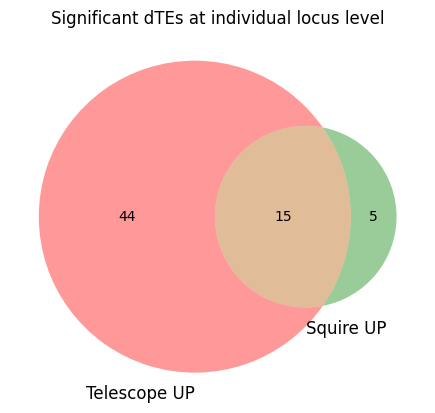

In [87]:
a = zc_venn_diagram( tele_sig_up['repName'], squire_sig_up['repName'], 'Telescope UP', 'Squire UP', 
                    title = "Significant dTEs at individual locus level", ax = None,
                    print_elements= True,
                    show_fig = True, save_fig = False,) #save_file_name = 'curr_venn.png')

intersection: {'RLTR4_MM-int', 'IAPLTR2_Mm', 'LTRIS_Mus', 'IAPLTR1_Mm', 'MTA_Mm', 'Lx2B2', 'MMERVK9E_I', 'IAPEz-int', 'ORR1B1-int', 'Lx10', 'B1_Mm', 'RMER13A2', 'ERVB7_2-LTR_MM', 'L1MdA_IV', 'B4A', 'Lx8', 'B3'}
Telescope Down has: 
{'(GCCTGG)n', 'IAPEy-int', 'MTEb', '(ATTCTG)n', '(AT)n', 'RLTR1B', 'B1_Mur1', 'RLTR50B', 'MMVL30-int', 'MMERVK10D3_I', 'IAP-d-int', '(GGAGCT)n', 'Lx5c', '(TTCC)n', 'ORR1A2', 'IAPEY4_I', 'MurSatRep1', '(TTTTTC)n', 'L1MdA_II', 'RMER6A', '(TCCT)n', '(AACA)n', 'B1_Mus2', 'RLTR21', 'L1MdGf_I', '(AAGA)n'}
Squire Down has: 
{'B1_Mus1', 'Lx5'}


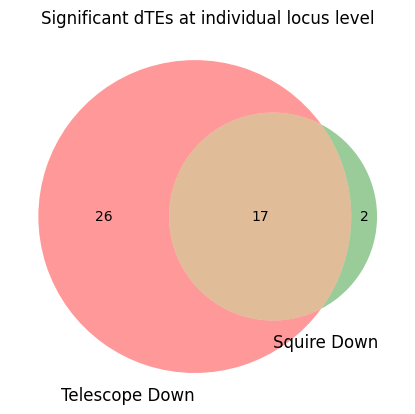

In [92]:
a = zc_venn_diagram( tele_sig_down['repName'], squire_sig_down['repName'], 'Telescope Down', 'Squire Down', 
                    title = "Significant dTEs at individual locus level", ax = None,
                    print_elements= True,
                    show_fig = True, save_fig = False,) #save_file_name = 'curr_venn.png')

intersection: {'Tigger18a', 'RLTR4_Mm', 'RLTR6_Mm', 'MMVL30-int', 'L1MdN_I'}
Telescope UP has: 
{'(TGCC)n', 'RLTR4_MM-int', 'RLTR1B-int', '(AGCTCC)n', 'MERVL-int', 'MMERGLN_LTR', '(CACCCG)n', '(CCAG)n', 'L1MC5a', '(GTTTTT)n', '(GAGGCT)n', '(AGGCCC)n', 'L1MC2'}
Squire UP has: 
{'RLTR6C_Mm'}


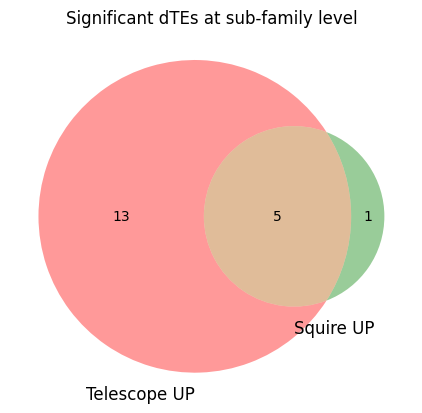

In [100]:
a = zc_venn_diagram( tele_subf_sig_up['repName'], squire_subf_sig_up['SubFam'], 'Telescope UP', 'Squire UP', 
                    title = "Significant dTEs at sub-family level", ax = None,
                    print_elements= True,
                    show_fig = True, save_fig = False,) #save_file_name = 'curr_venn.png')

intersection: {'ERVB7_2-LTR_MM', 'Lx10'}
Telescope UP has: 
{'(TGAAGCA)n', 'RMER12B', 'MERVL_2A-int', 'MMERVK9E_I', '(AATT)n', '(TCCT)n', '(GGGA)n', '(CCGCCT)n', 'LTR88c', 'ETnERV-int', 'Lx2A1', '(CTCTC)n', '(GGAGCT)n', '(CAGGTCT)n'}
Squire UP has: 
set()


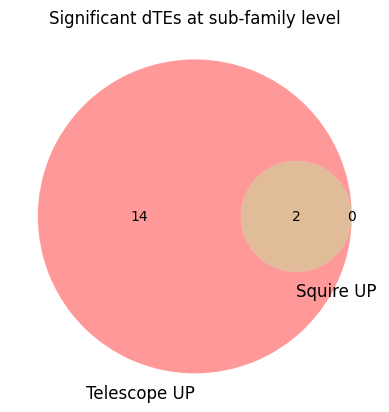

In [101]:
a = zc_venn_diagram( tele_subf_sig_down['repName'], squire_subf_sig_down['SubFam'], 'Telescope UP', 'Squire UP', 
                    title = "Significant dTEs at sub-family level", ax = None,
                    print_elements= True,
                    show_fig = True, save_fig = False,) #save_file_name = 'curr_venn.png')

## Prepare to check individual locus level consistency using genome location_overlap

### extract genome location for squire

In [55]:
squire_indiv.head(2) # can get chr, start and end

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268,PB1D9,Alu,SINE
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183,RSINE1,B4,SINE


In [72]:
new_col_names = ['genoName' , 'genoStart' , 'genoEnd', 'strand' ]
#positions = [0,1,2,5]
geno_df = pd.DataFrame( index = squire_indiv.index, columns= new_col_names)

In [73]:
for i in squire_indiv.index:
    te_id_ls = squire_indiv.loc[i, 'TE_ID'].split("|")
    strand = te_id_ls[5].split(",")[0]
    
    df_entry = te_id_ls[0:3] + [ strand ]
    geno_df.loc[i] = df_entry

In [74]:
geno_df.shape

(15235, 4)

In [75]:
geno_df.head()

,genoName,genoStart,genoEnd,strand
0,chr13,73480020,73480091,-
1,chr5,117467874,117468005,-
2,chr3,96619212,96619284,+
3,chr15,93388865,93388965,-
4,chr11,94175967,94176153,-


In [76]:
geno_df['strand'].unique()

array(['-', '+'], dtype=object)

In [77]:
squire_indiv = squire_indiv.merge( geno_df, left_index=True, right_index = True,copy = False )

In [78]:
squire_indiv.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268,PB1D9,Alu,SINE,chr13,73480020,73480091,-
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183,RSINE1,B4,SINE,chr5,117467874,117468005,-
2,"chr3|96619212|96619284|ID4:ID:SINE|194|+,.",5.772588,0.121464,0.852163,0.142536,0.942801,1.0,TE,ID4:ID:SINE,ID4:ID:SINE_194,ID4,ID,SINE,chr3,96619212,96619284,+
3,"chr15|93388865|93388965|PB1:Alu:SINE|227|-,.",32.028966,-0.216654,0.390147,-0.555314,0.978578,1.0,TE,PB1:Alu:SINE,PB1:Alu:SINE_227,PB1,Alu,SINE,chr15,93388865,93388965,-
4,"chr11|94175967|94176153|B2_Mm2:B2:SINE|98|-,.",7.127690,0.305487,0.591882,0.516129,0.893386,1.0,TE,B2_Mm2:B2:SINE,B2_Mm2:B2:SINE_98,B2_Mm2,B2,SINE,chr11,94175967,94176153,-


In [134]:
squire_indiv['repClass'].value_counts()

repClass
SINE           7295
LTR            4985
LINE           2090
DNA             695
Retroposon       52
scRNA            49
rRNA             43
snRNA            14
srpRNA            9
Unspecified       2
tRNA              1
Name: count, dtype: int64

### extract genome location for telescope

In [79]:
tele_indiv.head( 2)
# chromosome location need to be mapped from the rmsk table

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class
0,(A)n_15,24.106309,-0.599525,0.288728,-2.076435,0.037854,0.279189,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat
1,(A)n_16,51.369320,-0.115342,0.200885,-0.574169,0.565853,0.863508,Simple_repeat,Simple_repeat,(A)n,(A)n|Simple_repeat,(A)n|Simple_repeat|Simple_repeat


In [80]:
tele_rmsk = pd.read_csv("./mm39_rmsk_full.tsv", header = 0, index_col = None, delimiter= '\t' )

In [81]:
tele_rmsk.head(2)

,#bin,swScore,milliDiv,milliDel,milliIns,genoName,genoStart,genoEnd,genoLeft,strand,repName,repClass,repFamily,repStart,repEnd,repLeft,id
0,1,3777,194,105,11,chr1,8387806,8388657,-186765622,+,Lx2B2,LINE,L1,5997,7041,-8,7
1,1,595,269,47,47,chr1,41942994,41943142,-153211137,+,B3,SINE,B2,4,151,-65,6


In [82]:
transcript_id = tele_rmsk['repName'] + '_' + tele_rmsk['swScore'].astype( str)

In [83]:
transcript_id[0]

'Lx2B2_3777'

In [84]:
tele_rmsk['transcript_id'] = transcript_id

In [91]:
tele_indiv.shape

(186774, 12)

In [93]:
tele_indiv_geno = tele_indiv.merge( right = tele_rmsk[[ 'transcript_id' , 'genoName' , 'genoStart' , 'genoEnd', 'strand']], left_on = 'transcript_id', right_on = 'transcript_id',  )

In [94]:
tele_indiv_geno.shape

(3744343, 16)

In [95]:
len( tele_indiv_geno['transcript_id'].unique() )

186774

In [96]:
tele_indiv_geno[ tele_indiv_geno['transcript_id'].duplicated() ]['repClass'].unique()

array(['Simple_repeat', 'scRNA', 'rRNA', 'snRNA', 'srpRNA',
       'Low_complexity', 'DNA', 'LINE', 'SINE', 'LTR', 'Satellite', 'RC',
       'Unknown', 'Retroposon', 'Unspecified', 'tRNA'], dtype=object)

In [97]:
tele_indiv_geno = tele_indiv_geno[ ~np.isin( tele_indiv_geno['repClass'] , ['Simple_repeat' , 'Low_complexity' , 'Unknown' , 'Unspecified'] )]

In [98]:
tele_indiv_geno.shape

(2522282, 16)

In [99]:
tele_indiv_geno.head()

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class,genoName,genoStart,genoEnd,strand
1064900,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr2,146494727,146494784,-
1064901,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr3,93437305,93437355,-
1064902,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr3,105768897,105768944,+
1064903,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr3,147258559,147258599,+
1064904,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr4,120450129,120450191,-


### write a function to check genome location overlap

In [7]:
#' chr10 '.strip()

In [29]:
def genome_overlap( loc1, loc2, check_strand = False, 
                   check_num_overlap = True, num_overlap_thresh = 20, 
                   check_pct_overlap = False, pct_overlap_thresh = 0.1):
    """This function checks if the two input genome location has overlap.
    It can check either by the absolute number of overlapped base, 
    or the pct overlap, where pct is by the length of the shorter sequence
    
    @param loc1, loc2: should be in form of list [chr, start, end, strand]
    @param check_strand: taking into account the strand information when comparing genome location overlap 
    @param check_num_overlap, check_pct_overlap: boolean to set to decide which method to use
    @param num_overlap: the absolute number of bases to threshold for overlap if check_num_overlap set True. Uses >= comparison.
    @param pct_overlap: the fraction ( decimal between 0 to 1) of the shorter sequence to threshold for overlap. Uses >= comparison"""

    # digit of the corresponding genome position numbers in the input loc list
    CHR = 0
    STA = 1
    END = 2
    STR = 3
    
    if( check_num_overlap or check_pct_overlap): # check if at least one threshold method is chosen
        
        if( check_num_overlap == check_pct_overlap ): # check if all methods are chosen
            print( "Choose one threshold method please")
            return
    else:
        print( "Choose at least one threshold method please" )
        return

    if( len( loc1) !=4 or len( loc2) !=4):
        print( "the location list should have 4 elements: Chromosome, Start, End, Strand" )
        return False

    # check if in the same chromosome
    if( (loc1[CHR]).strip() != (loc2[CHR]).strip() ): 
        return False

    # check if all elements has >0 length
    if( (loc1[END] - loc1[STA]) == 0): return
    if( (loc2[END] - loc2[STA]) == 0): return

    # check if enough overlap starting from here

    # sort the fragment based on ascending genome location number
    # just arbitrarily assign here as if loc1 has the smaller start position
    seq1s = loc1[STA]
    seq1e = loc1[END]
    seq2s = loc2[STA]
    seq2e = loc2[END]
    
    if( loc1[STA] > loc2[STA] ): # compare and flip if loc1 has a larger start position
        seq1s = loc2[STA]
        seq1e = loc2[END]
        seq2s = loc1[STA]
        seq2e = loc1[END]

    if( seq2s >= seq1e ):
        return False # no overlap 

    
    #if have overlap, check threshold here

    # check stranding agreement here
    if( check_strand):
        if( loc1[STR] != loc2[STR ] ):
            return False
    
    if( seq2e <= seq1e ): # test if one sequence is a subset of the other sequence ( one long seq contains another shorter seq)
        #print( f'Overlaping sequence: {loc1}, {loc2}')
        return True

    #get number of overlap 
    num_overlap = seq1e - seq2s

    if ( check_num_overlap):
        return ( num_overlap >= num_overlap_thresh )
    else:
        seq1_len = seq1e - seq1s
        seq2_len = seq2e - seq2s
        shorter_len = min( seq1_len, seq2_len)
        return ( ( num_overlap/float(shorter_len) ) >= pct_overlap_thresh )
    
        

    
        

### test the function

In [30]:
def test_wrapper( loc1, loc2,
                 thresh_num_bool_ls, expected_res_ls,
                 test_name = 'Current test', 
                 check_strand = False ):
    """ This is a wrapper function to do the test with a given input test set. Each set of locations will be tested in both order and requires both order to pass.
    @param loc1, loc2: the genome locations to be tested
    @param thresh_num_bool_ls: a list of boolean to indicate which threshold method will be used. True if test number threshold only, False if test pct threshold. Will loop through each element.
    @param expected_res_ls: the expected result ls to be compared for assertion. Should match both the length and result for the thresh_num_bool_ls
    @param: test_name: test case name

    @return: None, but will print out assert message"""

    print( f"Testting {test_name} now: ")

    for i,thr in enumerate( thresh_num_bool_ls):
        res_order = genome_overlap( loc1, loc2, check_num_overlap = thr, check_pct_overlap = ( ~ thr), check_strand = check_strand )
        res_oppo_order = genome_overlap( loc2, loc1, check_num_overlap = thr, check_pct_overlap = ( ~ thr), check_strand = check_strand )

        print( '\ttesting reorder result consistency')
        assert (res_order == res_oppo_order), f"At threshold_num = {thr} condition, reorder genome location yield different result"
        
        print( '\ttesting output and expected value consistency')
        assert res_order == expected_res_ls[i], f"At threshold_num = {thr} condition, expected {expected_res_ls[i]}, but output is {res_order}"

    print( f"Pass! for {test_name}\n")

In [104]:
# test genome locations

# test1: two non-overlapping seq
# test1a: diff chrome but overlapping seq
t1a_loc1 = [ 'chr2', 100, 200 , '+'] 
t1a_loc2 = ['chr3', 101, 201 , '+']
t1a_expect = [ False, False ] 
t1a_thresh_num = [ True, False ] # test both thresholding method ( whether thresh num or not) 

# test1b: same chrome but non-overlapping
t1b_loc1 = [ 'chr2', 100, 200 , '+'] 
t1b_loc2 = ['chr2', 200 , 300, '+']
t1b_expect = False, False
t1b_thresh_num = [ True, False ]

# test2: small overlap not passing num or pct thresh
t2_loc1 = [ 'chr2', 100, 200, '+' ]
t2_loc2 = ['chr2', 195, 295, '+']
t2_expect = False, False
t2_thresh_num = [ True, False ]

# test3: small overlap passing num but not pct thresh
t3a_loc1 = ['chr2' , 100, 600, '+']
t3a_loc2 = [ 'chr2' , 575, 875, '+' ]
t3a_expect = [ True, False ]
t3a_thresh_num = [ True, False ] 

In [105]:
test_wrapper( t1a_loc1, t1a_loc2, thresh_num_bool_ls = t1a_thresh_num, expected_res_ls = t1a_expect,
             test_name = 'Test_1a' )

Testting Test_1a now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_1a



In [106]:
test_wrapper( t1b_loc1, t1b_loc2, thresh_num_bool_ls = t1b_thresh_num, expected_res_ls = t1b_expect,
             test_name = 'Test_1b' )

Testting Test_1b now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_1b



In [107]:
test_wrapper( t2_loc1, t2_loc2, thresh_num_bool_ls = t2_thresh_num, expected_res_ls = t2_expect,
             test_name = 'Test_2' )
test_wrapper( t3a_loc1, t3a_loc2, thresh_num_bool_ls = t3a_thresh_num, expected_res_ls = t3a_expect,
             test_name = 'Test_3' )

Testting Test_2 now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_2

Testting Test_3 now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_3



In [116]:
# test4: small overlap passing pct but not thresh
t4_loc1 = ['chr2' , 100, 400, '+']
t4_loc2 = ['chr2' , 390, 450, '+']

t4_expect = False, True
t4_thresh_num = [True, False ] 

# t4b_expect = True
# t4b_thresh_num = [ False ] 

# test5: big overlap passing both
t5_loc1 = ['chr10' , 500, 700, '+' ] 
t5_loc2 = ['chr10' , 510, 720 , '+'] 
t5_expect = True, True
t5_thresh_num = [ True, False ]

# test6: one seq is the subset of another seq 
t6a_loc1 = [ 'chr10', 500, 700, '+' ] # long enough overlap passing the thresholds
t6a_loc2 = [ 'chr10', 600, 690, '+' ]

t6b_loc1 = [ 'chr10', 500, 700, '+' ] # short overlap that could overwise not passing threshold if not being a subset
t6b_loc2 = [ 'chr10', 600, 605, '+' ]

t6_expect = True, True
t6_thresh_num = [ True, False ]

In [119]:
test_wrapper( t4_loc1, t4_loc2, thresh_num_bool_ls = t4_thresh_num, expected_res_ls = t4_expect,
             test_name = 'Test_4' )
test_wrapper( t5_loc1, t5_loc2, thresh_num_bool_ls = t5_thresh_num, expected_res_ls = t5_expect,
             test_name = 'Test_5' )

Testting Test_4 now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_4

Testting Test_5 now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_5



In [120]:
test_wrapper( t6a_loc1, t6a_loc2, thresh_num_bool_ls = t6_thresh_num, expected_res_ls = t6_expect,
             test_name = 'Test_6a' )
test_wrapper( t6b_loc1, t6b_loc2, thresh_num_bool_ls = t6_thresh_num, expected_res_ls = t6_expect,
             test_name = 'Test_6b' )

Testting Test_6a now: 
Overlaping sequence: ['chr10', 500, 700, '+'], ['chr10', 600, 690, '+']
Overlaping sequence: ['chr10', 600, 690, '+'], ['chr10', 500, 700, '+']
	testing reorder result consistency
	testing output and expected value consistency
Overlaping sequence: ['chr10', 500, 700, '+'], ['chr10', 600, 690, '+']
Overlaping sequence: ['chr10', 600, 690, '+'], ['chr10', 500, 700, '+']
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_6a

Testting Test_6b now: 
Overlaping sequence: ['chr10', 500, 700, '+'], ['chr10', 600, 605, '+']
Overlaping sequence: ['chr10', 600, 605, '+'], ['chr10', 500, 700, '+']
	testing reorder result consistency
	testing output and expected value consistency
Overlaping sequence: ['chr10', 500, 700, '+'], ['chr10', 600, 605, '+']
Overlaping sequence: ['chr10', 600, 605, '+'], ['chr10', 500, 700, '+']
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_6b



In [124]:
# test7: if diff strand but overlapping location
t7_loc1 = ['chr10' , 500, 700, '+' ] 
t7_loc2 = ['chr10' , 510, 720 , '-']

t7_thresh_num = [ True, False ]

t7a_expect = [True, True] # not checking strand
t7b_expect = [False, False] # checking strand

In [126]:
test_wrapper( t7_loc1, t7_loc2, thresh_num_bool_ls = t7_thresh_num, expected_res_ls = t7a_expect,
             test_name = 'Test_7a' , check_strand= False)

test_wrapper( t7_loc1, t7_loc2, thresh_num_bool_ls = t7_thresh_num, expected_res_ls = t7b_expect,
             test_name = 'Test_7b' , check_strand= True)

Testting Test_7a now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_7a

Testting Test_7b now: 
	testing reorder result consistency
	testing output and expected value consistency
	testing reorder result consistency
	testing output and expected value consistency
Pass! for Test_7b



## Actual check: compare genome location overlap between squire and telescope

In [5]:
tele_indiv_geno = pd.read_csv("./genoLoc_Deseq_indiv_locus_result.csv", header = 0, index_col= None) 

In [6]:
tele_indiv_geno.head(2)

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class,genoName,genoStart,genoEnd,strand
0,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr2,146494727,146494784,-
1,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr3,93437305,93437355,-


In [7]:
squire_indiv = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = 0 ,index_col= 0)

In [8]:
squire_indiv.head(2)

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
0,"chr13|73480020|73480091|PB1D9:Alu:SINE|268|-,.",9.000885,-0.489762,0.629289,-0.778278,0.800222,1.0,TE,PB1D9:Alu:SINE,PB1D9:Alu:SINE_268,PB1D9,Alu,SINE,chr13,73480020,73480091,-
1,"chr5|117467874|117468005|RSINE1:B4:SINE|183|-,.",0.730917,-2.916743,3.081604,-0.946502,0.368835,1.0,TE,RSINE1:B4:SINE,RSINE1:B4:SINE_183,RSINE1,B4,SINE,chr5,117467874,117468005,-


In [130]:
# check the significant TEs if they have the genome location information
#tele_sig_up.head()

### getting significantly upregulated elements

In [9]:
squire_sig_up = squire_indiv[ (squire_indiv['padj'] < 1e-5) & (squire_indiv['log2FoldChange'] > 2) ]
squire_sig_down = squire_indiv[ (squire_indiv['padj'] < 1e-5) & (squire_indiv['log2FoldChange'] < -2) ]

In [10]:
tele_sig_up = tele_indiv_geno[ (tele_indiv_geno['padj'] < 1e-5) & (tele_indiv_geno['log2FoldChange'] > 2) ]
tele_sig_down = tele_indiv_geno[ (tele_indiv_geno['padj'] < 1e-5) & (tele_indiv_geno['log2FoldChange'] < -2) ]

In [11]:
squire_sig_up.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
279,chr7|116034016|116036134|RLTR4_MM-int:LTR:LTR|...,13.232138,7.261792,1.103073,6.583238,6.866753e-09,8.559487e-07,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_33,RLTR4_MM-int,LTR,LTR,chr7,116034016,116036134,+
845,"chr5|96975368|96975991|L1MC2:L1:LINE|284|-,.",84.993681,2.143785,0.213613,10.035838,4.290302e-08,4.946900e-06,TE,L1MC2:L1:LINE,L1MC2:L1:LINE_284,L1MC2,L1,LINE,chr5,96975368,96975991,-
1028,"chr13|4307360|4308212|RMER17B2:ERVK:LTR|222|+,.",57.907641,2.313474,0.250347,9.241055,7.746373e-08,8.620185e-06,TE,RMER17B2:ERVK:LTR,RMER17B2:ERVK:LTR_222,RMER17B2,ERVK,LTR,chr13,4307360,4308212,+
1229,"chr6|28924173|28924528|IAPLTR1_Mm:ERVK:LTR|92|-,.",22.575679,7.303348,1.085208,6.729908,3.153163e-09,4.008132e-07,TE,IAPLTR1_Mm:ERVK:LTR,IAPLTR1_Mm:ERVK:LTR_92,IAPLTR1_Mm,ERVK,LTR,chr6,28924173,28924528,-
1401,"chr15|76450505|76451202|RLTR4_Mm:ERV1:LTR|14|-,.",49.190795,7.103274,1.107265,6.415154,1.773626e-08,2.128352e-06,TE,RLTR4_Mm:ERV1:LTR,RLTR4_Mm:ERV1:LTR_14,RLTR4_Mm,ERV1,LTR,chr15,76450505,76451202,-


In [12]:
tele_sig_up.head()

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class,genoName,genoStart,genoEnd,strand
56475,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,36709993,36710089,+
56476,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,44956646,44956789,-
56477,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,127182468,127182524,-
56478,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,130708707,130708809,+
56479,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,158652115,158652216,-


In [13]:
print( squire_sig_up.shape)
print( tele_sig_up.shape)

(74, 17)
(808, 16)


<font color = green>need to create an df specific ID since TE names are not unique identifier for each locus
- format: <font color = red> df Index_repName
- eg: 1401_RLTR4_Mm

In [14]:
tele_df_ind = tele_sig_up.index.astype(str) + "_" + tele_sig_up['repName']

In [15]:
tele_df_ind[0:5]

56475    56475_B1F
56476    56476_B1F
56477    56477_B1F
56478    56478_B1F
56479    56479_B1F
dtype: object

In [16]:
tele_sig_up.set_index( tele_df_ind, drop = False, inplace= True )

In [17]:
tele_sig_up.head()

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class,genoName,genoStart,genoEnd,strand
56475_B1F,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,36709993,36710089,+
56476_B1F,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,44956646,44956789,-
56477_B1F,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,127182468,127182524,-
56478_B1F,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,130708707,130708809,+
56479_B1F,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,158652115,158652216,-


In [18]:
squire_df_ind = squire_sig_up.index.astype(str) + "_" + squire_sig_up['repName']

In [19]:
squire_df_ind[0:5]

279     279_RLTR4_MM-int
845            845_L1MC2
1028       1028_RMER17B2
1229     1229_IAPLTR1_Mm
1401       1401_RLTR4_Mm
dtype: object

In [20]:
squire_sig_up.set_index( squire_df_ind, inplace= True, )
squire_sig_up.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
279_RLTR4_MM-int,chr7|116034016|116036134|RLTR4_MM-int:LTR:LTR|...,13.232138,7.261792,1.103073,6.583238,6.866753e-09,8.559487e-07,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_33,RLTR4_MM-int,LTR,LTR,chr7,116034016,116036134,+
845_L1MC2,"chr5|96975368|96975991|L1MC2:L1:LINE|284|-,.",84.993681,2.143785,0.213613,10.035838,4.290302e-08,4.946900e-06,TE,L1MC2:L1:LINE,L1MC2:L1:LINE_284,L1MC2,L1,LINE,chr5,96975368,96975991,-
1028_RMER17B2,"chr13|4307360|4308212|RMER17B2:ERVK:LTR|222|+,.",57.907641,2.313474,0.250347,9.241055,7.746373e-08,8.620185e-06,TE,RMER17B2:ERVK:LTR,RMER17B2:ERVK:LTR_222,RMER17B2,ERVK,LTR,chr13,4307360,4308212,+
1229_IAPLTR1_Mm,"chr6|28924173|28924528|IAPLTR1_Mm:ERVK:LTR|92|-,.",22.575679,7.303348,1.085208,6.729908,3.153163e-09,4.008132e-07,TE,IAPLTR1_Mm:ERVK:LTR,IAPLTR1_Mm:ERVK:LTR_92,IAPLTR1_Mm,ERVK,LTR,chr6,28924173,28924528,-
1401_RLTR4_Mm,"chr15|76450505|76451202|RLTR4_Mm:ERV1:LTR|14|-,.",49.190795,7.103274,1.107265,6.415154,1.773626e-08,2.128352e-06,TE,RLTR4_Mm:ERV1:LTR,RLTR4_Mm:ERV1:LTR_14,RLTR4_Mm,ERV1,LTR,chr15,76450505,76451202,-


### Check genome overlap between squire and tele significantly upegulated elements
- will do both absolute length checking and pct checking
- use 40 as abs lenght and 0.1 as pct

In [138]:
tele_avg_len = tele_indiv_geno['genoEnd'] - tele_indiv_geno['genoStart']

In [140]:
tele_avg_len.mean()

217.55652302161297

In [142]:
squire_avg_len = squire_indiv['genoEnd'].astype(int) - squire_indiv['genoStart'].astype( int )
squire_avg_len.mean()

488.3247784706268

In [143]:
squire_sig_up.head()

,TE_ID,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,element_type,TE_name,TE_index,repName,repFamily,repClass,genoName,genoStart,genoEnd,strand
279,chr7|116034016|116036134|RLTR4_MM-int:LTR:LTR|...,13.232138,7.261792,1.103073,6.583238,6.866753e-09,8.559487e-07,TE,RLTR4_MM-int:LTR:LTR,RLTR4_MM-int:LTR:LTR_33,RLTR4_MM-int,LTR,LTR,chr7,116034016,116036134,+
845,"chr5|96975368|96975991|L1MC2:L1:LINE|284|-,.",84.993681,2.143785,0.213613,10.035838,4.290302e-08,4.946900e-06,TE,L1MC2:L1:LINE,L1MC2:L1:LINE_284,L1MC2,L1,LINE,chr5,96975368,96975991,-
1028,"chr13|4307360|4308212|RMER17B2:ERVK:LTR|222|+,.",57.907641,2.313474,0.250347,9.241055,7.746373e-08,8.620185e-06,TE,RMER17B2:ERVK:LTR,RMER17B2:ERVK:LTR_222,RMER17B2,ERVK,LTR,chr13,4307360,4308212,+
1229,"chr6|28924173|28924528|IAPLTR1_Mm:ERVK:LTR|92|-,.",22.575679,7.303348,1.085208,6.729908,3.153163e-09,4.008132e-07,TE,IAPLTR1_Mm:ERVK:LTR,IAPLTR1_Mm:ERVK:LTR_92,IAPLTR1_Mm,ERVK,LTR,chr6,28924173,28924528,-
1401,"chr15|76450505|76451202|RLTR4_Mm:ERV1:LTR|14|-,.",49.190795,7.103274,1.107265,6.415154,1.773626e-08,2.128352e-06,TE,RLTR4_Mm:ERV1:LTR,RLTR4_Mm:ERV1:LTR_14,RLTR4_Mm,ERV1,LTR,chr15,76450505,76451202,-


In [162]:
squire_sig_up.columns

Index(['TE_ID', 'baseMean', 'log2FoldChange', 'lfcSE', 'stat', 'pvalue',
       'padj', 'element_type', 'TE_name', 'TE_index', 'repName', 'repFamily',
       'repClass', 'genoName', 'genoStart', 'genoEnd', 'strand'],
      dtype='object')

In [144]:
squire_up_avg_len = squire_sig_up['genoEnd'].astype(int) - squire_sig_up['genoStart'].astype( int )
squire_up_avg_len.mean()

1840.9594594594594

In [145]:
tele_up_avg_len = tele_sig_up['genoEnd'] - tele_sig_up['genoStart']
tele_up_avg_len.mean()

418.08168316831683

### function to check overlap statitics 

In [31]:
def get_overlap_statistics( df1, df2, check_num_overlap, check_strand,
                           num_overlap_thresh = 20, pct_overlap_thresh = 0.1, 
                           loc_col_names = ['genoName', 'genoStart', 'genoEnd', 'strand'],
                           print_stat = True):
    """This function calculate the number of overlaps between two lists of TEs given their genome locations
    @param df1, df2 are the dataframe that contains the TEs to be compared. 
            The dfs' index must be unique and reflecting TE identity. 
            They must also contains genome information in the order of: chromosome number, start, end, strand with column nanmes given in loc_col_names
            Genome start and end columns must be numericals
    @param check_num_overlap, check_strand: boolean for the way to check overlaps. See genome_overlap function
    @param loc_col_names: column names in dfs reflecting chromosome number, start, end, strand
    @param print_stat: printing out the summary statistics
    @return unique_hit_ls, hit_dict: 
            unique_hit_ls is a set of df indices that shows overlap between the two TE lists. 
            hit_dict contains all overlaping elements in dict format. The keys are indices from the shorter list and the values are the indices from the longer list that overlap with the keys  """
    
    
    # first determine which list is shorter
    if( df1.shape[0] < df2.shape[0]):
        df_short = df1.copy()
        df_long = df2.copy()
    else:
        df_short = df2.copy()
        df_long = df1.copy()

    # declare key variables
    unique_hit_ls = []
    hit_dict = dict()

    for i_short in tqnb(iterable = df_short.index, desc="Number of elements checked:", ascii = '<<>><<>><<>><<>><<>>' ):
        #i_short = df_short.index[i]
        got_hit = False # flag to determine if already found overlap
        for i_long in df_long.index: 
            #check overlap
            loc1 = df_short.loc[i_short, loc_col_names ] 
            loc2 = df_long.loc[i_long, loc_col_names ]
            is_overlap = genome_overlap( loc1, loc2, 
                                        check_num_overlap = check_num_overlap, check_pct_overlap = ( ~ check_num_overlap),
                                        check_strand = check_strand, 
                                       num_overlap_thresh = num_overlap_thresh,
                                        pct_overlap_thresh = pct_overlap_thresh )

            if( is_overlap): 
                if( not got_hit):
                    # first time this i_short finds an overlap
                    
                    # add i_short to dict and create value list with i_long
                    hit_dict[ i_short] = [ i_long ]
                    
                    # add i_short and i_long to unique hit ls
                    unique_hit_ls = unique_hit_ls+ [i_short, i_long ]
                    
                    # update got_hit
                    got_hit = True
                    
                else: 
                    # this i_short has already had overlapped sequence with some other i_long
                    
                    # add i_long to the value list in the dict
                    hit_dict[i_short] = hit_dict[i_short] + [i_long ]
                    
                    # add i_long to unqiue hit list
                    unique_hit_ls = unique_hit_ls + [i_long ]

    # Calculate key metrics
    if( print_stat):

        print( f"Long list has {df_long.shape[0]} elements")
        print( f"Short list has {df_short.shape[0]} elements")

        # count number of unique hits
        unique_hit_ls = set( unique_hit_ls)
        total_unique_hit_count = len( unique_hit_ls )
    
        # count number of hits with each short list element + length of short list elements that get hits
        found_i_long = 0
        found_i_short = len( hit_dict.keys() )
        
        for k,v in hit_dict.items():
            num_v = len( set( v ) )
            found_i_long += num_v
        total_hit_count = found_i_long + found_i_short

        avg_hit = total_hit_count / float(df_long.shape[0] + df_short.shape[0])

        print( f"Number of unique hits: {total_unique_hit_count}")
        print( f"Number of elements found overlaps:")
        print( f"\tFrom short list: {found_i_short}")
        print( f"\tFrom long list: {found_i_long}")
        print( f"\tTotal: {total_hit_count}")
        print( f"Avg. hit across all element tested: {avg_hit}")

    


    
    return set( unique_hit_ls), hit_dict



### result for up regulated elements

In [23]:
tele_sig_up[['genoStart', 'genoEnd']] = tele_sig_up[['genoStart', 'genoEnd']].astype(int)
squire_sig_up[['genoStart', 'genoEnd']] = squire_sig_up[['genoStart', 'genoEnd']].astype(int)

In [32]:
uniq_ls, hit_dict = get_overlap_statistics( df1 = tele_sig_up, df2 = squire_sig_up,
                                           check_num_overlap = True, check_strand = True,
                                           num_overlap_thresh = 40, pct_overlap_thresh = 0.1,
                                           loc_col_names = ['genoName', 'genoStart', 'genoEnd', 'strand'],
                                           print_stat = True)
sig_up_by_num_uniq = uniq_ls
sig_up_by_num_hit_dict = hit_dict.copy()

Number of elements checked::   0%|          | 0/74 [00:00<?, ?it/s]

Long list has 808 elements
Short list has 74 elements
Number of unique hits: 104
Number of elements found overlaps:
	From short list: 52
	From long list: 52
	Total: 104
Avg. hit across all element tested: 0.11791383219954649


In [33]:
sig_up_by_num_hit_dict

{'279_RLTR4_MM-int': ['2320117_RLTR4_MM-int'],
 '1028_RMER17B2': ['2356998_RMER17B2'],
 '1604_RLTR4_MM-int': ['2320303_RLTR4_MM-int'],
 '1762_RLTR4_MM-int': ['2319979_RLTR4_MM-int'],
 '1780_RLTR4_MM-int': ['2325657_RLTR4_MM-int'],
 '1837_RLTR4_MM-int': ['2320089_RLTR4_MM-int'],
 '1891_RLTR4_MM-int': ['2319751_RLTR4_MM-int'],
 '1936_RLTR4_MM-int': ['2325652_RLTR4_MM-int'],
 '2187_RLTR4_MM-int': ['2320293_RLTR4_MM-int'],
 '2240_IAPEz-int': ['966380_IAPEz-int'],
 '2730_MMVL30-int': ['1739788_MMVL30-int'],
 '3348_RLTR4_MM-int': ['2319919_RLTR4_MM-int'],
 '3390_MMVL30-int': ['1739409_MMVL30-int'],
 '4128_RLTR4_MM-int': ['2320408_RLTR4_MM-int'],
 '4915_RLTR4_MM-int': ['2320016_RLTR4_MM-int'],
 '5525_IAPLTR1_Mm': ['970991_IAPLTR1_Mm'],
 '5634_RLTR4_Mm': ['2326647_RLTR4_Mm'],
 '5858_RLTR4_MM-int': ['2320166_RLTR4_MM-int'],
 '5984_RLTR4_MM-int': ['2320306_RLTR4_MM-int'],
 '6106_RLTR4_Mm': ['2326648_RLTR4_Mm'],
 '6228_RLTR4_MM-int': ['2324932_RLTR4_MM-int'],
 '6296_IAPEY4_I': ['963904_IAPEY4_I']

In [34]:
sig_up_by_num_uniq

{'1028_RMER17B2',
 '10869_RLTR4_MM-int',
 '11074_RLTR4_MM-int',
 '11081_L1MdGf_II',
 '11292_RLTR4_Mm',
 '12019_Tigger18a',
 '12106_MT2B1',
 '12235_RLTR4_MM-int',
 '1241523_L1MC5a',
 '12455_RLTR4_Mm',
 '12535_IAPEz-int',
 '1262112_L1MdA_III',
 '12794_MMVL30-int',
 '12940_RLTR6_Mm',
 '1300865_L1MdGf_II',
 '13050_RLTR4_MM-int',
 '13166_IAPLTR1_Mm',
 '13909_IAPEz-int',
 '14539_RLTR4_Mm',
 '15085_RLTR4_MM-int',
 '1604_RLTR4_MM-int',
 '1739409_MMVL30-int',
 '1739626_MMVL30-int',
 '1739788_MMVL30-int',
 '1744187_MT2B1',
 '1762_RLTR4_MM-int',
 '1780_RLTR4_MM-int',
 '1837_RLTR4_MM-int',
 '1891_RLTR4_MM-int',
 '1936_RLTR4_MM-int',
 '2187_RLTR4_MM-int',
 '2240_IAPEz-int',
 '2319513_RLTR4_MM-int',
 '2319751_RLTR4_MM-int',
 '2319763_RLTR4_MM-int',
 '2319919_RLTR4_MM-int',
 '2319921_RLTR4_MM-int',
 '2319924_RLTR4_MM-int',
 '2319979_RLTR4_MM-int',
 '2320016_RLTR4_MM-int',
 '2320089_RLTR4_MM-int',
 '2320117_RLTR4_MM-int',
 '2320166_RLTR4_MM-int',
 '2320293_RLTR4_MM-int',
 '2320303_RLTR4_MM-int',
 '232

In [191]:
uniq_ls, hit_dict = get_overlap_statistics( df1 = tele_sig_up, df2 = squire_sig_up,
                                           check_num_overlap = False, check_strand = True,
                                           num_overlap_thresh = 40, pct_overlap_thresh = 0.5,
                                           loc_col_names = ['genoName', 'genoStart', 'genoEnd', 'strand'],
                                           print_stat = True)
sig_up_by_pct_uniq = uniq_ls
sig_up_by_pct_hit_dict = hit_dict.copy()

#pct and number hits are the same result


Number of elements checked:: 100%|>>>>>>>>>>>>>>| 74/74 [00:43<00:00,  1.71it/s]

Long list has 808 elements
Short list has 74 elements
Number of unique hits: 104
Number of elements found overlaps:
	From short list: 52
	From long list: 52
	Total: 104
Avg. hit across all element tested: 0.11791383219954649


In [37]:
# check overlap within lists
uniq_ls, hit_dict = get_overlap_statistics( df1 = tele_sig_up, df2 = tele_sig_up,
                                           check_num_overlap = True, check_strand = True,
                                           num_overlap_thresh = 40, pct_overlap_thresh = 0.1,
                                           loc_col_names = ['genoName', 'genoStart', 'genoEnd', 'strand'],
                                           print_stat = True)
tele_sig_up_by_num_uniq = uniq_ls
tele_sig_up_by_num_hit_dict = hit_dict.copy()

Number of elements checked::   0%|          | 0/808 [00:00<?, ?it/s]

Long list has 808 elements
Short list has 808 elements
Number of unique hits: 808
Number of elements found overlaps:
	From short list: 808
	From long list: 810
	Total: 1618
Avg. hit across all element tested: 1.0012376237623761


<font color = red>there are only 2 genome locations overlapping within the telescope table! though there are only 102 unique transcript ID but 800 genome locations! 

In [39]:
len( tele_sig_up['transcript_id'].unique() )

102

### result for down regulated results

In [35]:
tele_sig_down[['genoStart', 'genoEnd']] = tele_sig_down[['genoStart', 'genoEnd']].astype(int)
squire_sig_down[['genoStart', 'genoEnd']] = squire_sig_down[['genoStart', 'genoEnd']].astype(int)

In [36]:
uniq_ls, hit_dict = get_overlap_statistics( df1 = tele_sig_down, df2 = squire_sig_down,
                                           check_num_overlap = True, check_strand = True,
                                           num_overlap_thresh = 40, pct_overlap_thresh = 0.1,
                                           loc_col_names = ['genoName', 'genoStart', 'genoEnd', 'strand'],
                                           print_stat = True)
sig_down_by_num_uniq = uniq_ls
sig_down_by_num_hit_dict = hit_dict.copy()

Number of elements checked::   0%|          | 0/33 [00:00<?, ?it/s]

Long list has 889 elements
Short list has 33 elements
Number of unique hits: 47
Number of elements found overlaps:
	From short list: 24
	From long list: 24
	Total: 48
Avg. hit across all element tested: 0.052060737527114966


In [ ]:
sig_down_by_num_hit_dict

In [194]:
uniq_ls, hit_dict = get_overlap_statistics( df1 = tele_sig_down, df2 = squire_sig_down,
                                           check_num_overlap = False, check_strand = True,
                                           num_overlap_thresh = 40, pct_overlap_thresh = 0.5,
                                           loc_col_names = ['genoName', 'genoStart', 'genoEnd', 'strand'],
                                           print_stat = True)
sig_down_by_pct_uniq = uniq_ls
sig_down_by_pct_hit_dict = hit_dict.copy()


Number of elements checked:: 100%|>>>>>>>>>>>>>>| 33/33 [00:21<00:00,  1.56it/s]

Long list has 889 elements
Short list has 33 elements
Number of unique hits: 47
Number of elements found overlaps:
	From short list: 24
	From long list: 24
	Total: 48
Avg. hit across all element tested: 0.052060737527114966


## save data

In [ ]:
# save the data first
# check where in the ranked DGE lists are the overlapped elements 
# 

### load log table

In [49]:
logi = pd.read_csv("./OUTPUT_EXPLAIN.csv", index_col = 0)
logi.head()

,count_table_indiv.csv,count_table_subF.csv,mm39_rmsk_full.tsv
nb_created,1,1,downloaded from ucsc table browser
nb_updated,NaN,NaN,1
explain,count table obtained from combining the final_...,count table obtained from the indiv count tabl...,"added the column of transcript_id, which is th..."


In [50]:
logi.columns

Index(['count_table_indiv.csv', 'count_table_subF.csv', 'mm39_rmsk_full.tsv'], dtype='object')

In [51]:
# add explanation for R generated result
logi['Deseq_indiv_locus_results.csv'] = ['R1' , 'NA' , 'Deseq result individual loci level. Generated from R1 deseq pipeline.']

### save and update log file of the squire indiv dTE df that is from the turner organoid directory

In [203]:
squire_indiv.to_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/Deseq_indiv_dTE_results.csv", header = True, index = True )

In [204]:
squire_logi = pd.read_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/OUTPUT_EXPLAIN.csv", index_col = 0 )
squire_logi.columns

Index(['Deseq_indiv_dTE_results.csv', 'Deseq_TJP2KO_vs_WT_results.csv',
       'Deseq_indiv_dGene_results.csv', 'Deseq_subF_dGene_results.csv',
       'Deseq_subF_dTE_results.csv'],
      dtype='object')

In [206]:
squire_logi.index

Index(['nb_created', ' nb_updated', 'explain'], dtype='object')

In [207]:
squire_logi.loc[ ' nb_updated', 'Deseq_indiv_dTE_results.csv'] = 'telescope_dir_nb3'

In [211]:
squire_logi.loc[ 'explain', 'Deseq_indiv_dTE_results.csv'] = squire_logi.loc[ 'explain', 'Deseq_indiv_dTE_results.csv'] + ' Updated in telescope dir nb3 to add genome location and repName, repClass etc'  

In [212]:
squire_logi.loc[ 'explain', 'Deseq_indiv_dTE_results.csv'] 

'Deseq dTE result comparing TJP2 KO and WT turner organoid data at individual loci level. Extracted from Deseq_TJP2KO_vs_WT_results.csv Updated in telescope dir nb3 to add genome location and repName, repClass etc'

In [213]:
squire_logi.to_csv("/home/lucy/Dropbox/turner_organoid_bulk_RNA_local/OUTPUT_EXPLAIN.csv", header = True, index = True )

### save telescope tables

In [195]:
tele_indiv.shape

(186774, 12)

In [196]:
tele_indiv_geno.shape

(2522282, 16)

In [215]:
tele_indiv_geno.to_csv("./genoLoc_Deseq_indiv_locus_result.csv", header = True, index = False)

In [214]:
tele_indiv_geno.head(2)

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class,genoName,genoStart,genoEnd,strand
1064900,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr2,146494727,146494784,-
1064901,4.5SRNA_226,0.840241,-0.411335,2.059217,-0.199753,0.841674,NaN,scRNA,scRNA,4.5SRNA,4.5SRNA|scRNA,4.5SRNA|scRNA|scRNA,chr3,93437305,93437355,-


In [41]:
tele_sig_up.head(2)

,transcript_id,baseMean,log2FoldChange,lfcSE,stat,pvalue,padj,repClass,repFamily,repName,name_fam,name_fam_class,genoName,genoStart,genoEnd,strand
56475_B1F,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,36709993,36710089,+
56476_B1F,B1F_354,33.036745,2.129803,0.305731,6.966267,3.254608e-12,4.160732e-10,SINE,Alu,B1F,B1F|Alu,B1F|Alu|SINE,chr1,44956646,44956789,-


In [42]:
tele_sig_up.to_csv("./compare_dTE_overlap/tele_sig_up.csv", header = True, index = True)

In [43]:
tele_sig_down.to_csv("./compare_dTE_overlap/tele_sig_down.csv", header = True, index = True)

In [44]:
squire_sig_up.to_csv("./compare_dTE_overlap/squire_sig_up.csv", header = True, index = True)

In [45]:
squire_sig_down.to_csv("./compare_dTE_overlap/squire_sig_down.csv", header = True, index = True)

In [46]:
import pickle

In [47]:
with open("./compare_dTE_overlap/sig_up_hit_dict.pkl", 'wb') as f:
    pickle.dump( sig_up_by_num_hit_dict, f )

### write log file

In [52]:
logi['genoLoc_Deseq_indiv_locus_result.csv'] = ['3' , 'NA' , 'Derived from the Deseq_indiv_locus_results csv file. Added genome location information mapped from rmsk. Note that there are more rows in this table than in the original deseq table because some transcript ID can map to multiple genome locations']

In [53]:
logi['compare_dTE_overlap/'] = [ '3', 'NA' , 'this folder contains temporary files used to compare dTE overlap between squire and telescope methods']

In [54]:
logi.to_csv("./OUTPUT_EXPLAIN.csv", header = True, index= True )